## k-Means for Image Compression

The goal of this exercise is to use k-means clustering for image compression in Python.

##### a) Load an image of the famous painting "American Gothic" by Grand Wood, and store it as an RGB-image. 

In [2]:
# For easy image loading, we use skimage.io via io.imread(url)
# You can get it via installing the scikit-image module/package
# e.g. by executing this command from a cell -->   %pip install scikit-image
%pip install scikit-image
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/12.9 MB 7.4 MB/s eta 0:00:02
   -------- ------------------------------- 2.9/12.9 MB 7.3 MB/s eta 0:00:02
   ------------- -------------------------- 4.5/12.9 MB 7.2 MB/s eta 0:00:02
   ------------------ --------------------- 6.0/12.9 MB 7.2 MB/s eta 0:00:01
   ----------------------- ---------------- 7.6/12.9 MB 7.3 MB/s eta 0:00:01
   ----------------------------- ---------- 9.4/12.9 MB 7.2 MB/s eta 0:00:01
   --------------------------------- ------ 10.7/12.9 MB 7.3 MB/s eta 0:00:01
   -------------------------------------- - 12.3/12.9 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 7.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------------ --------- 1.3/1.7 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 6.7 MB/s eta 0:00:00
Note: you may


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# load the image
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/cc/Grant_Wood_-_American_Gothic_-_Google_Art_Project.jpg/895px-Grant_Wood_-_American_Gothic_-_Google_Art_Project.jpg"
img = io.imread(url)

# save it locally
io.imsave("original.png", img)

In [4]:
# note, that the image is stored as a 3-dimensional numpy array
print("image data type:", type(img))
print("image shape:", img.shape)

image data type: <class 'numpy.ndarray'>
image shape: (1080, 895, 3)


In [5]:
# the third axis specifies the "color channels" of the image,
# split each channel into a seperate variable
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

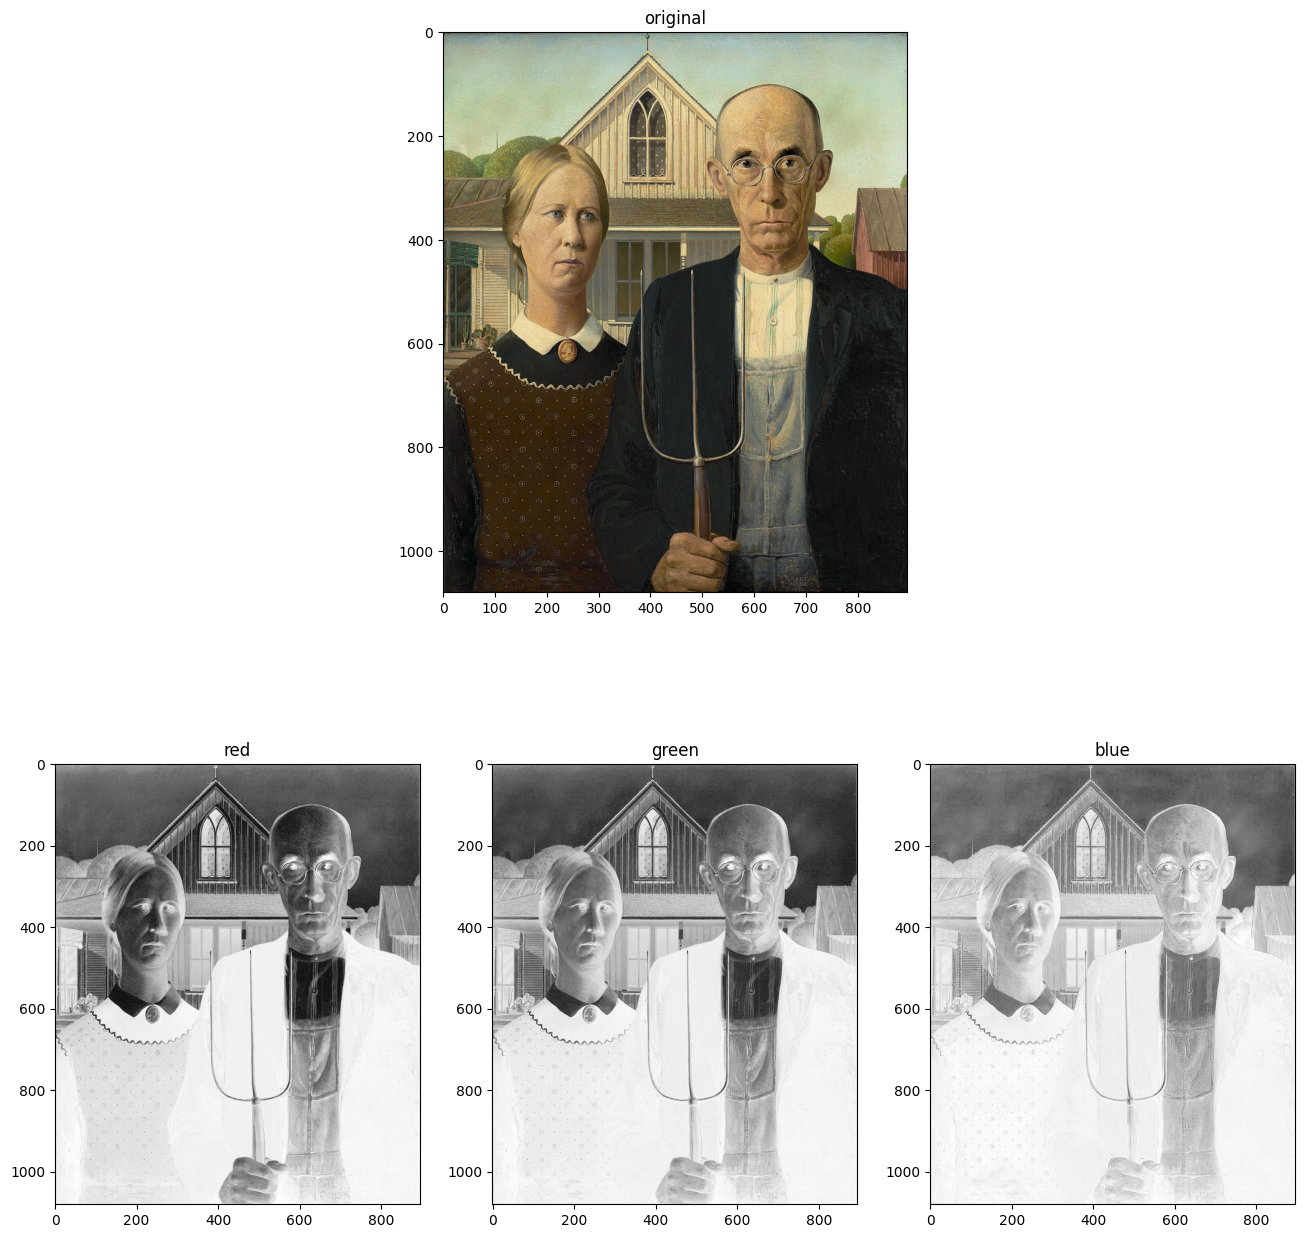

In [6]:
# have a look at the original image and the single channels

# prepare pyplot figure
fig = plt.figure(figsize=(16, 16))

# draw original image
fig.add_subplot(2, 1, 1)
plt.title("original")
plt.imshow(img)

# draw reds
fig.add_subplot(2, 3, 4)
plt.title("red")
plt.imshow(r, cmap="Greys")

# draw greens
fig.add_subplot(2, 3, 5)
plt.title("green")
plt.imshow(g, cmap="Greys")

# draw blues
fig.add_subplot(2, 3, 6)
plt.title("blue")
plt.imshow(b, cmap="Greys")

plt.show()

##### b) How many unique colors does the painting contain?

In [7]:
# The idea here is to reshape the 3 channel image, such that each (x, y) pair
# (a.k.a. each pixel) can be indexed by a single value. Instead of a 
# 1080 x 995 x 3 tensor, we now get a 966600 x 3 matrix, where rows correspond 
# to pixel coordinates. This way, we can count the unique rows in this matrix, 
# and get exactly the unique colors.

# Number of unique colors
pimg = img.reshape(-1, 3)
print("Unique colors:", len(np.unique(pimg, axis=0)))

Unique colors: 105911


##### c) Apply k-means clustering to compress the image. 

In [8]:
# solution
def compress_image(image, number_of_clusters, keep_kmeans_objects=False):
  
  # reshape image to color space
  img = image.reshape(-1, 3) / 255
  
  # apply kmeans
  km = KMeans(n_clusters=number_of_clusters, init="random", max_iter=300, n_init="auto")
  km.fit(img)
  new_colors = km.cluster_centers_[km.predict(img)]
  compressed_image = new_colors.reshape(image.shape[0], image.shape[1], 3)
  
  # the values may fall out of range [0, 255], and need to be
  #  renormalized accordingly (alternative: clipping)
  compressed_image = (compressed_image - np.min(compressed_image))
  compressed_image = (compressed_image * 255 / np.max(compressed_image))  \
                     .astype(np.uint8)
  
  returns = None
  if keep_kmeans_objects:
    returns = compressed_image, km
  else:
    returns = compressed_image
  return returns

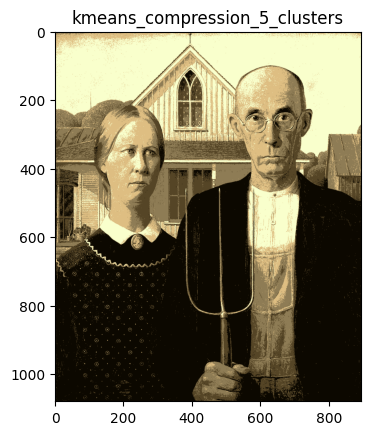

In [9]:
# use the custom function to compress the original image using 5 clusters
cimg = compress_image(img, 5)
plt.title("kmeans_compression_5_clusters")
plt.imshow(cimg)

##### d) Apply k-means clustering for $k\in\{1, 2, 3, 5, 10, 15, 20\}$. Save the compressed images of each iteration. If your computer is strong enough, try up to k=50. Observe the size of the image files. Looking at the images, at what point do you notice deminishing improvements in terms of image quality?

In [10]:
cluster_numbers = [1, 2, 3, 5, 10, 15, 20]
for k in cluster_numbers:
    cimg = compress_image(img, k)
    io.imsave("kmeans_compression_"+str(k)+"_components.png", cimg)

c:\Users\tscha\BAML\.venv\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: kmeans_compression_1_components.png is a low contrast image
  return func(*args, **kwargs)


##### e) Determine a reasonable number of clusters using the "elbow criterion". For this purpose, plot the total within-cluster sum of squares (attribute "inertia_" of the "KMeans" object) against the number of clusters, e.g. for $k\in[1, 10]$. Does the "elbow point" correspond to your visual impression in part d)?

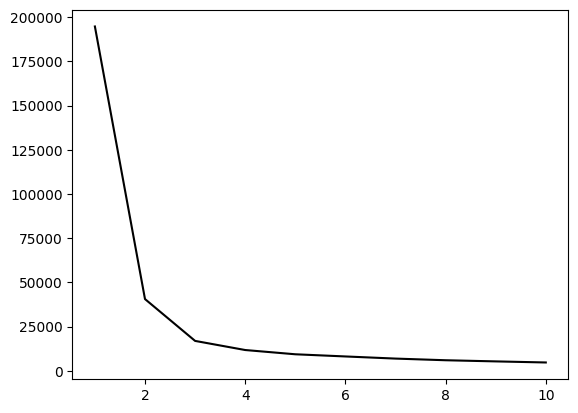

In [11]:
n = 10
x = np.linspace(1, n, n)
y = []

for i in range(1, n+1):
    cimg, km = compress_image(img, i, keep_kmeans_objects=True)
    y.append(km.inertia_)

plt.plot(x, y, color="black")

# Elbow criterion yields k=2 or k=3 (ambiguous).